In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [52]:
%matplotlib inline

##  1. Basic EDA

In [53]:
customers = pd.read_csv('customers.csv')
items = pd.read_csv('items.csv')
orders = pd.read_csv('orders.csv')
trucks = pd.read_csv('trucks.csv')

In [54]:
customers.head(10)

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
0,47,اخري,100123.0,الهرم,Giza,الهرم,29.99344,31.15219,2020-07-06,523.786667,3.0,3.0,2020-11-12,1571.36
1,634,كشك,100140.0,مصر القديمة,Cairo,مصر القديمة,NaN,NaN,2020-01-20,2665.551667,6.0,4.0,2020-08-07,15993.31
2,841,اخري,100128.0,المعادي,Cairo,NaN,NaN,NaN,2020-01-23,1459.375000,6.0,2.0,2020-12-15,8756.25
3,863,اخري,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-01-23,NaN,NaN,NaN,NaN,NaN
4,986,اخري,100125.0,حلوان,Cairo,المعصرة,29.84495,31.33025,2020-01-27,5618.270000,1.0,1.0,2020-06-14,5618.27
5,1008,كشك,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-01-28,NaN,NaN,NaN,NaN,NaN
6,1068,اخري,100125.0,حلوان,Cairo,حدايق حلوان,NaN,NaN,2020-01-21,1989.783333,18.0,11.0,2021-03-01,35816.10
7,1119,اخري,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN
8,1492,اخري,100206.0,المريوطيه - فيصل,Giza,المريوطيه - فيصل,NaN,NaN,2020-01-28,5664.990000,5.0,1.0,2021-03-06,28324.95
9,1516,اخري,100000.0,Others,Cairo,Others,NaN,NaN,2020-01-28,NaN,NaN,NaN,NaN,NaN


In [55]:
profile_cust = ProfileReport(customers, 'Capiter customers data', explorative=True)

In [56]:
profile_cust.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
customers_akhri = customers[customers.buyer_business_type.isin(['اخري'])]
customers_not_akhri = customers[~customers.buyer_business_type.isin(['اخري'])]

In [58]:
profile_cust_akhri = ProfileReport(customers_akhri, 'Capiter customers data', explorative=True)
profile_cust_not_akhri = ProfileReport(customers_not_akhri, 'Capiter customers data', explorative=True)

In [59]:

profile_cust_akhri.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
customers_akhri

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
0,47,اخري,100123.0,الهرم,Giza,الهرم,29.99344,31.15219,2020-07-06,523.786667,3.0,3.0,2020-11-12,1571.36
2,841,اخري,100128.0,المعادي,Cairo,NaN,NaN,NaN,2020-01-23,1459.375000,6.0,2.0,2020-12-15,8756.25
3,863,اخري,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-01-23,NaN,NaN,NaN,NaN,NaN
4,986,اخري,100125.0,حلوان,Cairo,المعصرة,29.84495,31.33025,2020-01-27,5618.270000,1.0,1.0,2020-06-14,5618.27
6,1068,اخري,100125.0,حلوان,Cairo,حدايق حلوان,NaN,NaN,2020-01-21,1989.783333,18.0,11.0,2021-03-01,35816.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,2342,اخري,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-02-03,NaN,NaN,NaN,NaN,NaN
9733,2414,اخري,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-02-04,NaN,NaN,NaN,NaN,NaN
9734,2430,اخري,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-02-04,NaN,NaN,NaN,NaN,NaN
9777,13191,اخري,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-01-28,1852.526000,5.0,4.0,2020-09-06,9262.63


In [61]:
profile_cust_akhri.to_notebook_iframe()

In [62]:
orders.head()

,Order_ID,item_id,customer_id,Order_date,total_ITem_amount,requested_quantity
0,ORD-3880388,226,34506,2020-09-21,94.0,1
1,ORD-3880388,223,34506,2020-09-21,94.0,1
2,ORD-3880388,634,34506,2020-09-21,233.0,1
3,ORD-3880388,25,34506,2020-09-21,119.0,2
4,ORD-3880388,56,34506,2020-09-21,119.0,1


In [63]:
profile_orders = ProfileReport(orders, 'Capiter orders data', explorative=True)
profile_orders.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 2. Customer Segmentation and Promotions

### 2.1 Pre-processing data for clustering

In [64]:
# Dropping buyer_business_type اخري because 77.7% of the customers have no transaction or orders data
cust_filtered = customers[~customers.buyer_business_type.isin(['اخري'])]

In [65]:
cust_filtered.head()

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
1,634,كشك,100140.0,مصر القديمة,Cairo,مصر القديمة,NaN,NaN,2020-01-20,2665.551667,6.0,4.0,2020-08-07,15993.31
5,1008,كشك,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-01-28,NaN,NaN,NaN,NaN,NaN
13,2229,كشك,100193.0,مصر الجديدة,Cairo,مصر الجديدة,NaN,NaN,2020-02-02,NaN,NaN,NaN,NaN,NaN
14,2454,سوبر ماركت,100202.0,جسر السويس,Cairo,جسر السويس,30.13423,31.36224,2020-02-04,3183.550000,1.0,1.0,2020-04-08,3183.55
15,2566,كشك,100134.0,مدينه نصر,Cairo,مدينه نصر,NaN,NaN,2020-02-04,2243.595000,2.0,0.0,2021-02-07,4487.19


In [66]:
cust_filtered.shape[0]

8680

In [67]:
cust_filtered.nunique()

customer_id                         8676
buyer_business_type                    7
district_id                           75
district_name_ar                      73
city_name_en                           2
area_name_ar                         196
geo_latitude                        5555
geo_longitude                       5539
registration_date                    221
avg_ticket_size                     4181
number_of_transactions                60
number_of_cancelled_transactions      32
last_order_date                      337
total_orders_amount                 4181
dtype: int64

In [68]:
cust_filtered.shape

(8680, 14)

In [69]:
# There are some duplicates in customer_id, so we need to drop these
cust_filtered = cust_filtered.drop_duplicates(subset='customer_id', keep='first')
cust_filtered.customer_id.nunique() == cust_filtered.shape[0]

True

In [70]:
cust_filtered

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount
1,634,كشك,100140.0,مصر القديمة,Cairo,مصر القديمة,NaN,NaN,2020-01-20,2665.551667,6.0,4.0,2020-08-07,15993.31
5,1008,كشك,100128.0,المعادي,Cairo,المعادي,NaN,NaN,2020-01-28,NaN,NaN,NaN,NaN,NaN
13,2229,كشك,100193.0,مصر الجديدة,Cairo,مصر الجديدة,NaN,NaN,2020-02-02,NaN,NaN,NaN,NaN,NaN
14,2454,سوبر ماركت,100202.0,جسر السويس,Cairo,جسر السويس,30.13423,31.36224,2020-02-04,3183.550000,1.0,1.0,2020-04-08,3183.55
15,2566,كشك,100134.0,مدينه نصر,Cairo,مدينه نصر,NaN,NaN,2020-02-04,2243.595000,2.0,0.0,2021-02-07,4487.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,23712,سوبر ماركت,100123.0,الهرم,Giza,ترسا,29.98804,31.16569,2020-09-23,NaN,NaN,NaN,NaN,NaN
9809,23734,سوبر ماركت,100123.0,الهرم,Giza,ترسا,29.98591,31.16800,2020-09-23,NaN,NaN,NaN,NaN,NaN
9810,26661,مطعم,100184.0,شبرا الخيمه,Cairo,شبرا الخيمه,30.14735,31.23896,2020-10-04,NaN,NaN,NaN,NaN,NaN
9812,3191,سوبر ماركت,100125.0,حلوان,Cairo,حدايق حلوان,29.89275,31.29660,2020-04-08,1785.578333,6.0,2.0,2021-02-22,10713.47


In [71]:
# dropping customers with NA transaction data
cust_filtered.isna().sum()

customer_id                            0
buyer_business_type                   13
district_id                           11
district_name_ar                      11
city_name_en                          11
area_name_ar                         360
geo_latitude                         769
geo_longitude                        769
registration_date                      0
avg_ticket_size                     4304
number_of_transactions              4304
number_of_cancelled_transactions    4304
last_order_date                     4304
total_orders_amount                 4304
dtype: int64

In [72]:

cust_filtered = cust_filtered.dropna(axis=0, how='all', subset=['avg_ticket_size','number_of_transactions',\
    'number_of_cancelled_transactions','last_order_date','total_orders_amount'])

In [73]:
cust_filtered.isna().sum()

customer_id                           0
buyer_business_type                   1
district_id                           1
district_name_ar                      1
city_name_en                          1
area_name_ar                        214
geo_latitude                        376
geo_longitude                       376
registration_date                     0
avg_ticket_size                       0
number_of_transactions                0
number_of_cancelled_transactions      0
last_order_date                       0
total_orders_amount                   0
dtype: int64

### 2.2 Recency, Frequency and Monetary value ranking of customers

In [74]:
# Recency, Frequence and monetary value are three commonly used metrics to quantify customer behaviour.
# Recency: No. of days since last transaction
# Frequency: Total no. of transactions in a given period
# Monetary value: Total amount spent by the customer 

In [75]:
#minimum and maximum last order dates
cust_filtered = cust_filtered.assign(last_order_date=pd.to_datetime(cust_filtered.last_order_date))
min_order_date = cust_filtered.last_order_date.min()
max_order_date = cust_filtered.last_order_date.max()
print('Minimum order date: ',min_order_date)
print('Maximum order date: ',max_order_date)

Minimum order date:  2020-03-10 00:00:00
Maximum order date:  2021-03-17 00:00:00


In [76]:
# Get recency value from arbitrary current date
curr_date = max_order_date + pd.to_timedelta('1D')


In [77]:
cust_filtered['recency'] = cust_filtered.apply(lambda x:(curr_date - x.last_order_date).days, axis=1)

In [78]:
cust_filtered['frequency'] = cust_filtered.number_of_transactions
cust_filtered['monetary_value'] = cust_filtered.total_orders_amount

In [79]:
# Feature engineering for Clustering

In [80]:
# Removing skew and standard scaling RFM features
cust_filtered['recency'] = np.log(cust_filtered.recency)
cust_filtered['frequency'] = np.log(cust_filtered.frequency)
cust_filtered['monetary_value'] = np.log(cust_filtered.monetary_value)

In [81]:
cust_filtered[['recency','frequency','monetary_value']]

,recency,frequency,monetary_value
1,5.407172,1.791759,9.679926
14,5.840642,0.000000,8.065752
15,3.663562,0.693147,8.408982
17,5.908083,0.000000,9.033985
18,5.093750,2.397895,9.990332
...,...,...,...
9804,2.079442,0.693147,8.734855
9805,5.017280,0.000000,6.227840
9807,5.176150,0.000000,5.560682
9812,3.178054,1.791759,9.279257


### 2.3 Standardizing data for clustering

In [82]:
scaler = StandardScaler()
cust_filtered = cust_filtered.assign(
    recency = lambda x : scaler.fit_transform(x.recency.values.reshape(-1,1)),
    frequency = lambda x : scaler.fit_transform(x.frequency.values.reshape(-1,1)),
    monetary_value = lambda x : scaler.fit_transform(x.monetary_value.values.reshape(-1,1))
)


In [83]:
cust_filtered

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount,recency,frequency,monetary_value
1,634,كشك,100140.0,مصر القديمة,Cairo,مصر القديمة,NaN,NaN,2020-01-20,2665.551667,6.0,4.0,2020-08-07,15993.31,0.779066,0.786922,0.971574
14,2454,سوبر ماركت,100202.0,جسر السويس,Cairo,جسر السويس,30.13423,31.36224,2020-02-04,3183.550000,1.0,1.0,2020-04-08,3183.55,1.092790,-1.162480,-0.200224
15,2566,كشك,100134.0,مدينه نصر,Cairo,مدينه نصر,NaN,NaN,2020-02-04,2243.595000,2.0,0.0,2021-02-07,4487.19,-0.482869,-0.408348,0.048941
17,2713,سوبر ماركت,100125.0,حلوان,Cairo,NaN,29.85856,31.31948,2020-03-15,8383.200000,1.0,1.0,2020-03-15,8383.20,1.141600,-1.162480,0.502658
18,2745,سوبر ماركت,100125.0,حلوان,Cairo,المعصرة,29.84112,31.33609,2020-03-17,1983.140909,11.0,7.0,2020-10-06,21814.55,0.552228,1.446387,1.196912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,17644,سوبر ماركت,100119.0,فيصل,Giza,كفر طهرمس,30.01475,31.18324,2020-07-29,3107.915000,2.0,1.0,2021-03-10,6215.83,-1.629373,-0.408348,0.285506
9805,17730,سوبر ماركت,100126.0,امبابة,Giza,المنيره,30.09660,31.21800,2020-08-04,506.660000,1.0,0.0,2020-10-18,506.66,0.496883,-1.162480,-1.534444
9807,23648,سوبر ماركت,100123.0,الهرم,Giza,المريوطية هرم,29.98846,31.18288,2020-09-22,260.000000,1.0,0.0,2020-09-22,260.00,0.611865,-1.162480,-2.018764
9812,3191,سوبر ماركت,100125.0,حلوان,Cairo,حدايق حلوان,29.89275,31.29660,2020-04-08,1785.578333,6.0,2.0,2021-02-22,10713.47,-0.834254,0.786922,0.680711


### 2.4 Clustering with KMeans

In [84]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(cust_filtered[['recency','frequency','monetary_value']])
cluster_labels = kmeans.labels_
cust_filtered_k2 = cust_filtered.assign(cluster = cluster_labels)

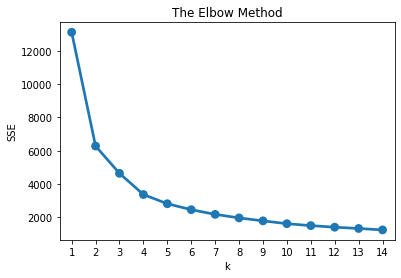

In [85]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(cust_filtered[['recency','frequency','monetary_value']])
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [86]:
# choosing by visual inspection of the elbow, 2 and 4 seem like good candidates
# choosing 4 for now
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(cust_filtered[['recency','frequency','monetary_value']])
cluster_labels = kmeans.labels_
cust_filtered_k4 = cust_filtered.assign(cluster = cluster_labels)

In [87]:
cust_filtered_k4

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount,recency,frequency,monetary_value,cluster
1,634,كشك,100140.0,مصر القديمة,Cairo,مصر القديمة,NaN,NaN,2020-01-20,2665.551667,6.0,4.0,2020-08-07,15993.31,0.779066,0.786922,0.971574,3
14,2454,سوبر ماركت,100202.0,جسر السويس,Cairo,جسر السويس,30.13423,31.36224,2020-02-04,3183.550000,1.0,1.0,2020-04-08,3183.55,1.092790,-1.162480,-0.200224,2
15,2566,كشك,100134.0,مدينه نصر,Cairo,مدينه نصر,NaN,NaN,2020-02-04,2243.595000,2.0,0.0,2021-02-07,4487.19,-0.482869,-0.408348,0.048941,1
17,2713,سوبر ماركت,100125.0,حلوان,Cairo,NaN,29.85856,31.31948,2020-03-15,8383.200000,1.0,1.0,2020-03-15,8383.20,1.141600,-1.162480,0.502658,2
18,2745,سوبر ماركت,100125.0,حلوان,Cairo,المعصرة,29.84112,31.33609,2020-03-17,1983.140909,11.0,7.0,2020-10-06,21814.55,0.552228,1.446387,1.196912,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,17644,سوبر ماركت,100119.0,فيصل,Giza,كفر طهرمس,30.01475,31.18324,2020-07-29,3107.915000,2.0,1.0,2021-03-10,6215.83,-1.629373,-0.408348,0.285506,1
9805,17730,سوبر ماركت,100126.0,امبابة,Giza,المنيره,30.09660,31.21800,2020-08-04,506.660000,1.0,0.0,2020-10-18,506.66,0.496883,-1.162480,-1.534444,2
9807,23648,سوبر ماركت,100123.0,الهرم,Giza,المريوطية هرم,29.98846,31.18288,2020-09-22,260.000000,1.0,0.0,2020-09-22,260.00,0.611865,-1.162480,-2.018764,2
9812,3191,سوبر ماركت,100125.0,حلوان,Cairo,حدايق حلوان,29.89275,31.29660,2020-04-08,1785.578333,6.0,2.0,2021-02-22,10713.47,-0.834254,0.786922,0.680711,1


In [88]:
cust_filtered_melt = pd.melt(cust_filtered_k4.reset_index(),
id_vars=['customer_id', 'cluster'],
value_vars=['recency', 'frequency', 'monetary_value'],
var_name='attribute',
value_name='value')

In [89]:
cust_filtered_melt

,customer_id,cluster,attribute,value
0,634,3,recency,0.779066
1,2454,2,recency,1.092790
2,2566,1,recency,-0.482869
3,2713,2,recency,1.141600
4,2745,3,recency,0.552228
...,...,...,...,...
13111,17644,1,monetary_value,0.285506
13112,17730,2,monetary_value,-1.534444
13113,23648,2,monetary_value,-2.018764
13114,3191,1,monetary_value,0.680711


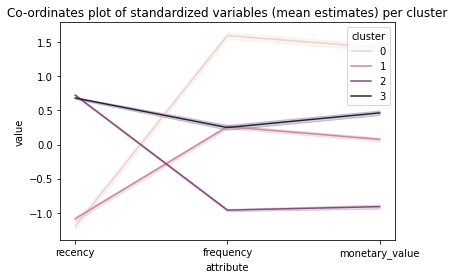

In [90]:
plt.title('Co-ordinates plot of standardized variables (mean estimates) per cluster')
sns.lineplot(x="attribute", y="value", hue='cluster', data=cust_filtered_melt)
plt.show()

In [91]:
# Add radar plot here

Clusters 0 and 2 need to be given the promotion. Cluster 0 because these are the most active customers contributing the highest monetary value and haven't been active lately and cluster 2 because these appear to be new users with low frequency and monetary values and should be incentivized to shop more.

In [92]:
cust_filtered_k4['promotions'] = [1 if c in (0,2) else 0 for c in cust_filtered_k4.cluster]

In [93]:
cust_filtered_k4[~cust_filtered_k4.cluster.isin([1,2])]

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions,number_of_cancelled_transactions,last_order_date,total_orders_amount,recency,frequency,monetary_value,cluster,promotions
1,634,كشك,100140.0,مصر القديمة,Cairo,مصر القديمة,NaN,NaN,2020-01-20,2665.551667,6.0,4.0,2020-08-07,15993.31,0.779066,0.786922,0.971574,3,0
18,2745,سوبر ماركت,100125.0,حلوان,Cairo,المعصرة,29.84112,31.33609,2020-03-17,1983.140909,11.0,7.0,2020-10-06,21814.55,0.552228,1.446387,1.196912,3,0
20,2762,سوبر ماركت,100134.0,مدينه نصر,Cairo,مدينه نصر,30.05410,31.39440,2020-03-17,6315.826364,11.0,3.0,2020-09-01,69474.09,0.693009,1.446387,2.037828,3,0
21,2778,سوبر ماركت,100125.0,حلوان,Cairo,حلوان,29.90610,31.29660,2020-03-18,2458.228696,23.0,8.0,2021-03-16,56539.26,-2.632702,2.248881,1.888270,0,1
22,2814,سوبر ماركت,100173.0,ميت نما,Cairo,ميت نما,30.14527,31.23358,2020-03-19,5941.565000,2.0,2.0,2020-03-19,11883.13,1.133690,-0.408348,0.755932,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,12358,سوبر ماركت,100106.0,العجوزة,Giza,العجوزة,30.05215,31.21480,2020-06-28,4237.635556,9.0,2.0,2020-10-03,38138.72,0.565428,1.228061,1.602462,3,0
9796,12852,سوبر ماركت,100125.0,حلوان,Cairo,حلوان,29.83845,31.30610,2020-07-06,2363.248889,9.0,1.0,2021-03-09,21269.24,-1.544128,1.228061,1.178534,0,1
9797,13039,سوبر ماركت,100169.0,المنيب,Giza,ميدان المنيب,29.98228,31.20725,2020-07-09,1757.793333,3.0,1.0,2020-07-19,5273.38,0.838244,0.032791,0.166141,3,0
9801,15191,سوبر ماركت,100143.0,شبرا الخيمة,Cairo,شبرا الخيمة,30.12340,31.24470,2020-05-21,4779.746667,9.0,4.0,2021-03-04,43017.72,-1.224352,1.228061,1.689853,0,1


In [94]:
output_promos = cust_filtered_k4[['customer_id', 'cluster', 'promotions']]

In [95]:
output_promos

,customer_id,cluster,promotions
1,634,3,0
14,2454,2,1
15,2566,1,0
17,2713,2,1
18,2745,3,0
...,...,...,...
9804,17644,1,0
9805,17730,2,1
9807,23648,2,1
9812,3191,1,0


In [96]:
output_promos.to_csv('output_promos.csv')

## 3. Data imputation of customers data with business type اخري using orders data

### 3.1 Creating last_order_date, number_of_transactions and total_orders_amount features for orders data 

In [97]:
orders

,Order_ID,item_id,customer_id,Order_date,total_ITem_amount,requested_quantity
0,ORD-3880388,226,34506,2020-09-21,94.0,1
1,ORD-3880388,223,34506,2020-09-21,94.0,1
2,ORD-3880388,634,34506,2020-09-21,233.0,1
3,ORD-3880388,25,34506,2020-09-21,119.0,2
4,ORD-3880388,56,34506,2020-09-21,119.0,1
...,...,...,...,...,...,...
623,ORD-6026834,1375,7122,2020-09-22,87.0,1
624,ORD-6026834,249,7122,2020-09-22,55.5,3
625,ORD-6026834,389,7122,2020-09-22,70.0,1
626,ORD-6026834,136,7122,2020-09-22,681.5,10


In [98]:
orders['Order_date'] = pd.to_datetime(orders.Order_date)
min_order_date = np.min(orders.Order_date)
max_order_date = np.max(orders.Order_date)
print('min order date: ', min_order_date)
print('max order date: ', max_order_date)
print('Total days data:', max_order_date - min_order_date)

min order date:  2020-09-15 00:00:00
max order date:  2020-09-22 00:00:00
Total days data: 7 days 00:00:00


In [99]:
last_order_date = orders.groupby(['customer_id']).apply(lambda df: np.max(df.Order_date))
last_order_date = pd.DataFrame(last_order_date, columns=['last_order_date'])
last_order_date

,last_order_date
customer_id,
5966,2020-09-22
7122,2020-09-22
7679,2020-09-22
8651,2020-09-22
11260,2020-09-17
...,...
35267,2020-09-22
35291,2020-09-22
35324,2020-09-22


In [100]:
number_of_transactions = orders.groupby('customer_id').apply(lambda df: len(df.Order_ID.unique()))
number_of_transactions = pd.DataFrame(number_of_transactions, columns=['number_of_transactions'])
number_of_transactions

,number_of_transactions
customer_id,
5966,1
7122,1
7679,5
8651,1
11260,1
...,...
35267,1
35291,1
35324,1


In [101]:
total_orders_amount = orders.groupby(['customer_id']).apply(lambda df: np.sum(df.total_ITem_amount))
total_orders_amount = pd.DataFrame(total_orders_amount, columns=['total_orders_amount'])
total_orders_amount

,total_orders_amount
customer_id,
5966,830.00
7122,2599.28
7679,11982.10
8651,2531.65
11260,537.50
...,...
35267,629.95
35291,2120.25
35324,1144.05


In [102]:
orders_feats = last_order_date.join([number_of_transactions,total_orders_amount], how='inner').reset_index()


In [103]:
orders_feats

,customer_id,last_order_date,number_of_transactions,total_orders_amount
0,5966,2020-09-22,1,830.00
1,7122,2020-09-22,1,2599.28
2,7679,2020-09-22,5,11982.10
3,8651,2020-09-22,1,2531.65
4,11260,2020-09-17,1,537.50
...,...,...,...,...
69,35267,2020-09-22,1,629.95
70,35291,2020-09-22,1,2120.25
71,35324,2020-09-22,1,1144.05
72,35385,2020-09-22,1,589.30


In [104]:
customers_akhri.merge(orders_feats, on='customer_id', how='inner', suffixes=('_left','_right'))

,customer_id,buyer_business_type,district_id,district_name_ar,city_name_en,area_name_ar,geo_latitude,geo_longitude,registration_date,avg_ticket_size,number_of_transactions_left,number_of_cancelled_transactions,last_order_date_left,total_orders_amount_left,last_order_date_right,number_of_transactions_right,total_orders_amount_right
0,33487,اخري,100113.0,الزيتون,Cairo,NaN,30.11079,31.31037,2020-10-26,NaN,NaN,NaN,NaN,NaN,2020-09-22,1,4993.00
1,31179,اخري,100119.0,فيصل,Giza,NaN,29.99559,31.15181,2020-10-20,401.835,4.0,3.0,2021-02-06,1607.34,2020-09-22,1,1845.50
2,33390,اخري,100134.0,مدينه نصر,Cairo,NaN,30.06168,31.38018,2020-10-26,576.240,1.0,0.0,2020-10-26,576.24,2020-09-18,1,899.25


Customers_akhri can be imputed from orders dataset but there isn't enough data in orders dataset to impute the 77% missing customer data with business type: اخري .